# Test statistics module 

In [1]:
from remove_duplicates.statistics import * 
from remove_duplicates.remove_duplicates import RemoveDuplicates

/home/kevin/anaconda3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
structures = RemoveDuplicates.get_structure_list('/home/kevin/Documents/uni/EPFL/master_thesis/CoRE-COF-Database/CoRE-COF-DT187-v1.0/')

In [3]:
rmsd_boostrapped = randomized_rmsd(structures, iterations=1000)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

/home/kevin/.local/lib/python3.6/site-packages/ase/io/cif.py:321: UserWarning: crystal system 'triclinic' is not interpreated for space group Spacegroup(1, setting=1). This may result in wrong setting!
  setting_name, spacegroup))
/home/kevin/.local/lib/python3.6/site-packages/ase/io/cif.py:321: UserWarning: crystal system 'orthorhombic' is not interpreated for space group Spacegroup(65, setting=1). This may result in wrong setting!
  setting_name, spacegroup))


The graph construction and comparison is a lot slower than RMSD. 

In [4]:
jaccard_bootstrapped = randomized_graphs(structures, iterations=1000)

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

/home/kevin/anaconda3/lib/python3.6/site-packages/pymatgen/io/cif.py:44: UserWarning: Please install optional dependency pybtex if youwant to extract references from CIF files.
  warnings.warn("Please install optional dependency pybtex if you"
/home/kevin/anaconda3/lib/python3.6/site-packages/pymatgen/io/cif.py:1113: UserWarning: Issues encountered while parsing CIF:
  warnings.warn("Issues encountered while parsing CIF:")
/home/kevin/anaconda3/lib/python3.6/site-packages/pymatgen/io/cif.py:1115: UserWarning: Some fractional co-ordinates rounded to ideal values to avoid finite precision errors.
  warnings.warn(error)


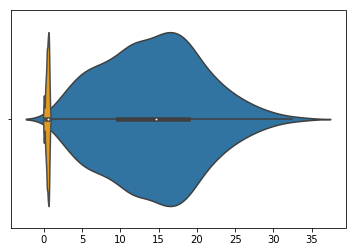

In [10]:
import seaborn as sns
sns.violinplot(rmsd_boostrapped)
sns.violinplot(jaccard_bootstrapped, color='orange')

In [6]:
nn_strategy = JmolNN()
crystal_a = Structure.from_file(structures[0])
sgraph_a = StructureGraph.with_local_env_strategy(
 crystal_a, nn_strategy)

In [7]:
reduced = crystal_a.get_reduced_structure()

In [33]:
sgraph_a = StructureGraph.with_local_env_strategy(reduced, nn_strategy)

In [3]:
RemoveDuplicates.get_graph_hash_dict(structures)

/home/kevin/anaconda3/lib/python3.6/site-packages/pymatgen/io/cif.py:44: UserWarning: Please install optional dependency pybtex if youwant to extract references from CIF files.
  warnings.warn("Please install optional dependency pybtex if you"
/home/kevin/anaconda3/lib/python3.6/site-packages/pymatgen/io/cif.py:1113: UserWarning: Issues encountered while parsing CIF:
  warnings.warn("Issues encountered while parsing CIF:")
/home/kevin/anaconda3/lib/python3.6/site-packages/pymatgen/io/cif.py:1115: UserWarning: Some fractional co-ordinates rounded to ideal values to avoid finite precision errors.
  warnings.warn(error)


defaultdict(list,
            {'-9223363290597773624-1349045280104071859': ['COF-42-gra.cif'],
             '8746257038554-600920063476364732': ['COF-43-bnn.cif'],
             '-92233632905977785652697310410815871463': ['HCC-H2P-COF.cif'],
             '87462569973598912403916040346899': ['CuP-SQ_COF.cif'],
             '87462569971496577234536943723366': ['H2P-COF.cif'],
             '-9223363290599915888129731885769613390': ['BLP-2H-AA.cif'],
             '-9223363290597736935752149876694523594': ['BF-COF-2.cif'],
             '87462570364718936999456459738780': ['HBC-COF-real.cif'],
             '87462570364154394952398246256316': ['TPBD-ME2.cif'],
             '8746254859938-1260323670865045566': ['3D-Py-COF-2P.cif'],
             '874625485978468378615800684533': ['T-COF_3.cif'],
             '-9223363290597736774-4146738376481495125': ['NTU-COF-2.cif'],
             '87462569973172555398341653980481': ['DAAQ-TFP_COF.cif'],
             '-9223363290597737468-1533187841467496254':

In [12]:
hash(str(reduced.composition))

614313006887747725